In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


2025-05-04 05:11:54.312574: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746315714.337306    5944 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746315714.344593    5944 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746315714.363186    5944 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746315714.363213    5944 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746315714.363217    5944 computation_placer.cc:177] computation placer alr

In [2]:
IMAGE_SIZE = 64
BATCH_SIZE = 64
EPOCHS = 5  # Start small to test stability

train_dir = 'asl_alphabet_train/asl_alphabet_train'


In [3]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # 20% will be used for validation
)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

num_classes = train_generator.num_classes


Found 69600 images belonging to 29 classes.
Found 17400 images belonging to 29 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/home/ajay/Documents/sleeping_dog_don/baldcat312/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1746315720.658380    5944 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2153 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3050 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 29)             │         3,741 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,628,893 (6.21 MB)

 Trainable params: 1,628,893 (6.21 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
history = model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)


Epoch 1/5


/home/ajay/Documents/sleeping_dog_don/baldcat312/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1746315722.913161    6170 service.cc:152] XLA service 0x7fdc0000a5f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746315722.913197    6170 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2025-05-04 05:12:02.950595: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746315723.204217    6170 cuda_dnn.cc:529] Loaded cuDNN version 90701


   4/1088 ━━━━━━━━━━━━━━━━━━━━ 49s 46ms/step - accuracy: 0.0430 - loss: 3.4939

I0000 00:00:1746315727.680489    6170 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1088/1088 ━━━━━━━━━━━━━━━━━━━━ 74s 63ms/step - accuracy: 0.3285 - loss: 2.2896 - val_accuracy: 0.5286 - val_loss: 1.3806
Epoch 2/5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.7842 - loss: 0.6312 - val_accuracy: 0.6853 - val_loss: 1.0407
Epoch 3/5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 46s 42ms/step - accuracy: 0.8777 - loss: 0.3557 - val_accuracy: 0.7251 - val_loss: 0.8918
Epoch 4/5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 45s 42ms/step - accuracy: 0.9125 - loss: 0.2481 - val_accuracy: 0.7330 - val_loss: 1.0096
Epoch 5/5
1088/1088 ━━━━━━━━━━━━━━━━━━━━ 45s 41ms/step - accuracy: 0.9288 - loss: 0.1971 - val_accuracy: 0.7198 - val_loss: 1.1273


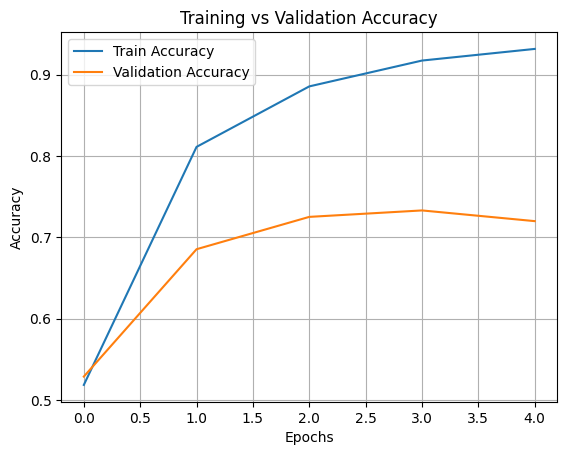

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 587ms/step


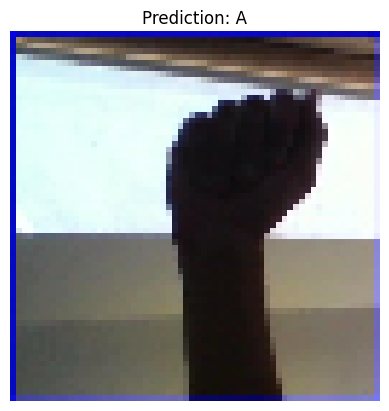

In [8]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(IMAGE_SIZE, IMAGE_SIZE))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction)
    class_labels = list(train_generator.class_indices.keys())
    predicted_label = class_labels[class_idx]

    plt.imshow(img)
    plt.title(f"Prediction: {predicted_label}")
    plt.axis('off')
    plt.show()

# Example:
predict_image('asl_alphabet_test/asl_alphabet_test/A_test.jpg')
